In [1]:
from Data_Loader import load_data
from Train2 import trainCox_nnet

import torch
import numpy as np
import pandas as pd
from torch.utils.data.dataloader import DataLoader
dtype = torch.FloatTensor

In [2]:
from Data_extraction_lung import data_norm_df_lung, output_df_lung

data_norm_df_lung= data_norm_df_lung.reset_index(drop=True)
output_df_lung = output_df_lung.reset_index(drop=True)

In [3]:
# from Data_extraction_pancreas import data_norm_df_pancreas, output_df_pancreas
# data_norm_df_pancreas= data_norm_df_pancreas.reset_index(drop=True)
# output_df_pancreas = output_df_pancreas.reset_index(drop=True)

In [11]:
data = pd.concat([data_norm_df_lung,output_df_lung], axis=1)
x, ytime, yevent, age = load_data(data, dtype)

<AxesSubplot:xlabel='vital_status', ylabel='count'>

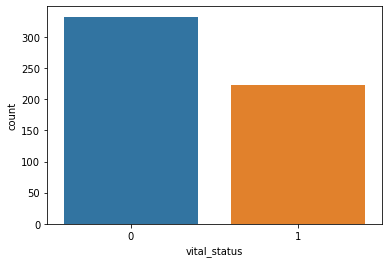

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.countplot(x='vital_status', data=data)

In [6]:
x_df=pd.DataFrame(x, columns = np.arange(len(x[0,:])))
data_cph = pd.concat([x_df,pd.DataFrame({'age': age[:,0], 'yevent': yevent[:,0], 'ytime': ytime[:,0]})], axis=1)
essai = data_cph.drop(data[data_cph.yevent==0].index)
essai2 = data_cph.drop(data_cph[data_cph.yevent==1].index)

C:\Users\anais\AppData\Local\Temp\ipykernel_18492\2735630853.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  essai = data_cph.drop(data[data_cph.yevent==0].index)


c:\Users\anais\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


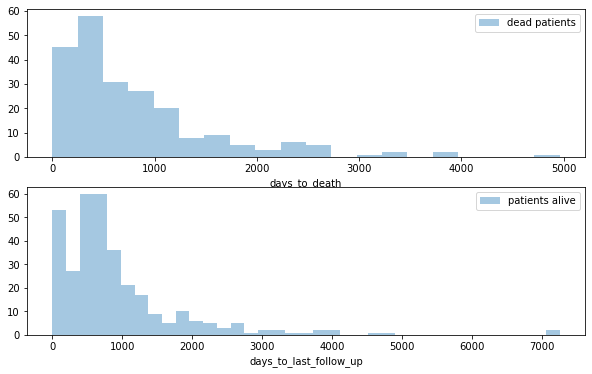

In [7]:
plt.figure(figsize=(10,6))
plt.subplot(211)
sns.distplot(essai['ytime'], kde=False, label='dead patients')
plt.xlabel('days_to_death')
plt.legend()
plt.subplot(212)
sns.distplot(essai2['ytime'], kde=False, label='patients alive')
plt.xlabel('days_to_last_follow_up')
plt.legend()


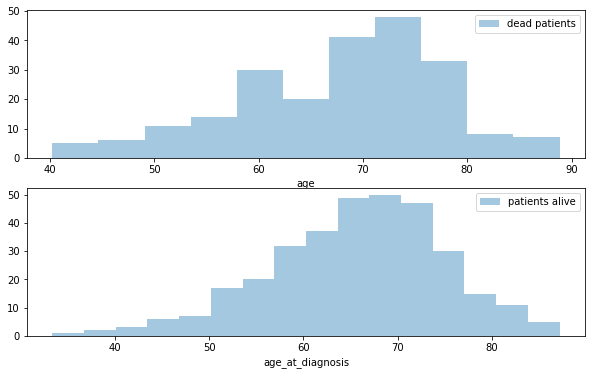

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 



plt.figure(figsize=(10,6))
plt.subplot(211)
sns.distplot(essai['age']/365, kde=False, label='dead patients')
plt.legend()
plt.subplot(212)
sns.distplot(essai2['age']/365, kde=False, label='patients alive')
plt.xlabel('age_at_diagnosis')
plt.legend()

PCA visualisation

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from Data_Loader import sort_data

x = StandardScaler().fit_transform(x)
pca = PCA(100)
pca.fit(x)
x = pca.transform(x)

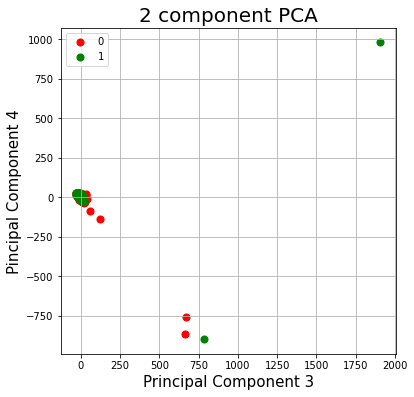

In [13]:
import matplotlib.pyplot as plt
principalDf = pd.DataFrame(data=x[:,0:2], columns = ['principal component 1', 'principal component 2'])
principalDf['yevent']= yevent
# finalDf = pd.concat([principalDf, yevent2], axis=1)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Pincipal Component 4', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r','g']
for target, color in zip(targets, colors): 
    indicesToKeep = principalDf['yevent']==target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s=50)
ax.legend(targets)
ax.grid()

In [14]:
from lifelines import KaplanMeierFitter

<AxesSubplot:xlabel='timeline'>

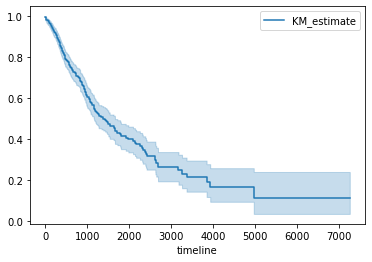

In [15]:
kmf = KaplanMeierFitter()
kmf.fit(durations = ytime, event_observed = yevent)
kmf.plot_survival_function()